<a href="https://colab.research.google.com/github/devbabbar7/DeepLearning.AI-TensorFlow/blob/main/Natural%20Language%20Processing%20Tensorflow/Single_Layer_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Single Layer LSTM
So far in this course, you've been using mostly basic dense layers and embeddings to build your models. It detects how the combination of words (or subwords) in the input text determines the output class. In the labs this week, you will look at other layers you can use to build your models. Most of these will deal with Recurrent Neural Networks, a kind of model that takes the ordering of inputs into account. This makes it suitable for different applications such as parts-of-speech tagging, music composition, language translation, and the like. For example, you may want your model to differentiate sentiments even if the words used in two sentences are the same:

1: My friends do like the movie but I don't. --> negative review
2: My friends don't like the movie but I do. --> positive review
The first layer you will be looking at is the LSTM (Long Short-Term Memory). In a nutshell, it computes the state of a current timestep and passes it on to the next timesteps where this state is also updated. The process repeats until the final timestep where the output computation is affected by all previous states. Not only that, it can be configured to be bidirectional so you can get the relationship of later words to earlier ones. If you want to go in-depth of how these processes work, you can look at the Sequence Models course of the Deep Learning Specialization. For this lab, you can take advantage of Tensorflow's APIs that implements the complexities of these layers for you. This makes it easy to just plug it in to your model. Let's see how to do that in the next sections below.

Download the dataset
For this lab, you will use the subwords8k pre-tokenized IMDB Reviews dataset. You will load it via Tensorflow Datasets as you've done last week:

In [19]:
import tensorflow_datasets as tfds

# Download the subword encoded pretokenized dataset
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)

# Get the tokenizer
tokenizer = info.features['text'].encoder

In [20]:
BUFFER_SIZE = 10000
BATCH_SIZE = 256

# Get the train and test splits
train_data, test_data = dataset['train'], dataset['test'], 

# Shuffle the training data
train_dataset = train_data.shuffle(BUFFER_SIZE)

# Batch and pad the datasets to the maximum length of the sequences
train_dataset = train_dataset.padded_batch(BATCH_SIZE)
test_dataset = test_data.padded_batch(BATCH_SIZE)

In [21]:
import tensorflow as tf

# Hyperparameters
embedding_dim = 64
lstm_dim = 64
dense_dim = 64

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Print the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 64)          523840    
                                                                 
 bidirectional_2 (Bidirectio  (None, 128)              66048     
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Set the training parameters
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
NUM_EPOCHS = 10

history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
98/98 [==============================] - 40s 358ms/step - loss: 0.5521 - accuracy: 0.6965 - val_loss: 0.4345 - val_accuracy: 0.8111
Epoch 2/10
98/98 [==============================] - 28s 287ms/step - loss: 0.3481 - accuracy: 0.8588 - val_loss: 0.4035 - val_accuracy: 0.8334
Epoch 3/10
98/98 [==============================] - 27s 269ms/step - loss: 0.2599 - accuracy: 0.9023 - val_loss: 0.4122 - val_accuracy: 0.8334
Epoch 4/10
98/98 [==============================] - 26s 265ms/step - loss: 0.2006 - accuracy: 0.9288 - val_loss: 0.3847 - val_accuracy: 0.8485
Epoch 5/10
98/98 [==============================] - 25s 252ms/step - loss: 0.1601 - accuracy: 0.9453 - val_loss: 0.3987 - val_accuracy: 0.8503
Epoch 6/10
98/98 [==============================] - 24s 240ms/step - loss: 0.1339 - accuracy: 0.9550 - val_loss: 0.4812 - val_accuracy: 0.8230
Epoch 7/10
98/98 [==============================] - 23s 234ms/step - loss: 0.1164 - accuracy: 0.9609 - val_loss: 0.5084 - val_accuracy: 0.8294

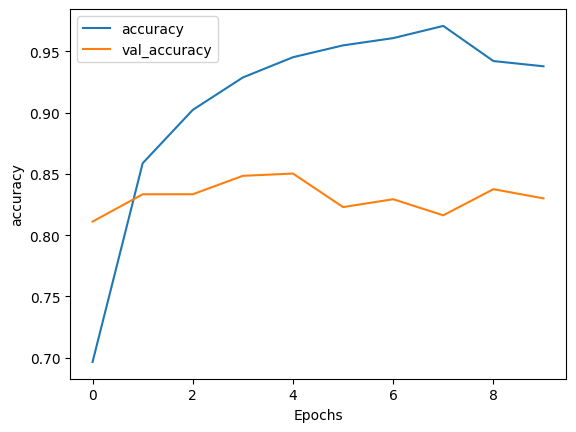

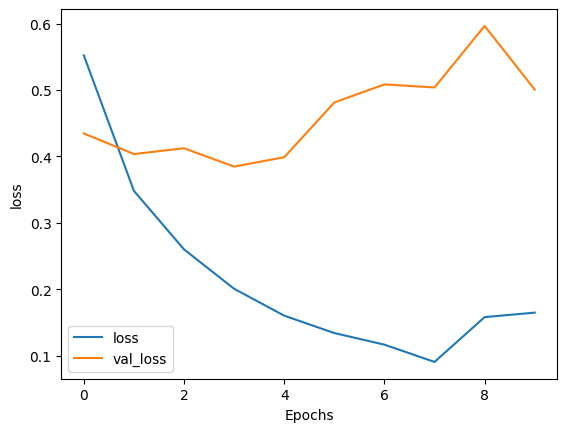

In [24]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and results 
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")